# Analyze gradients of images wrt sub masses

In [1]:
import sys, os
sys.path.append('../')

import logging
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from simulation.wrapper import augmented_data
from simulation.units import M_s
import astropy

logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

In [2]:
astropy.__version__

'3.1.2'

## Settings

In [3]:
n_cols = 1
n_rows = 1

## Make data

In [4]:
theta, imgs, t_xz, log_r_xz, sub_latents, global_latents, dx_dm = augmented_data(
    f_sub=0.05, beta=-1.9, n_images=n_cols*n_rows, mine_gold=True,
    draw_alignment=False, draw_host_mass=False, draw_host_redshift=False,
    calculate_dx_dm=True, roi_size=5., return_dx_dm=True
)

16:45 simulation.wrapper   INFO    Simulating image 1 / 1


## Plot subhalos

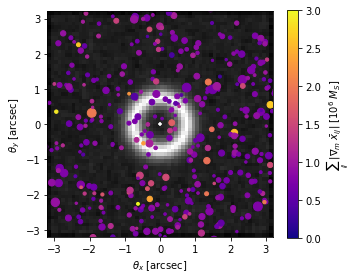

In [5]:
plt.figure(figsize=(n_cols*5.,n_rows*4.))

for i in range(n_cols*n_rows):
    ax = plt.subplot(n_rows,n_cols,i+1)
        
    plt.imshow(
        np.log10(imgs[i]),
        vmin=2.3,
        vmax=3.2,
        cmap='gist_gray',
        extent=(-3.2,3.2,-3.2,3.2),
        origin="lower"
    )
    sc = plt.scatter(
        sub_latents[i][:,1],
        sub_latents[i][:,2],
        c=1.e6*sub_latents[i][:,3]*M_s,
        s=195 + 30 * np.log10(sub_latents[i][:,0] / global_latents[i,0]),
        cmap="plasma",
        vmin=0.,
        vmax=3.,
    )
    plt.scatter(
        [global_latents[i,4]],
        [global_latents[i,5]],
        c=["white"],
        marker="+",
        s=20.,
    )
    cbar = plt.colorbar(sc)
    
    plt.xlim(-3.2,3.2)
    plt.ylim(-3.2,3.2)

    plt.xlabel(r"$\theta_x$ [arcsec]")
    plt.ylabel(r"$\theta_y$ [arcsec]")
    cbar.set_label(r'$\sum_{ij} \; |\nabla_{m} \; \bar{x}_{ij}|$ [$10^6\;M_S$]')
    
    
plt.tight_layout()
plt.savefig("../figures/subhalo_gradients.pdf")

## Relation between subhalo properties and gradient

In [27]:
f_subs = np.concatenate(
    [sub_latents[i][:,0] / global_latents[i,0] for i in range(n_cols*n_rows)],
    axis=0
)
grads = np.concatenate(
    [sub_latents[i][:,3] for i in range(n_cols*n_rows)],
    axis=0
) * 1.e6 * M_s
rnorms = np.concatenate(
    [(sub_latents[i][:,1]**2 + sub_latents[i][:,2]**2)**0.5 for i in range(n_cols*n_rows)],
    axis=0
)

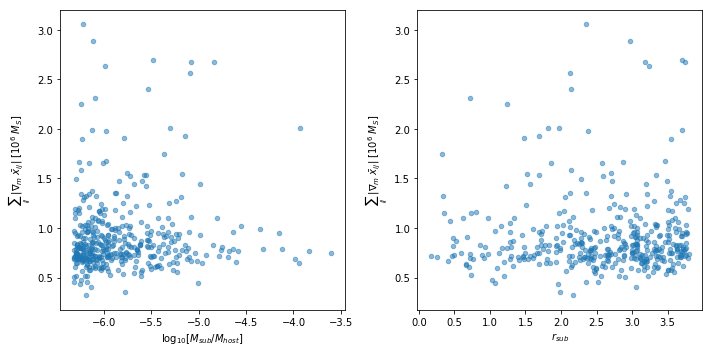

In [39]:
plt.figure(figsize=(10,5))

ax = plt.subplot(1,2,1)
plt.scatter(
    np.log10(f_subs),
    grads,
    s=20.,
    alpha=0.5,
)
#plt.ylim(0.,3.)
plt.xlabel(r'$\log_{10} [M_{sub} / M_{host}]$')
plt.ylabel(r'$\sum_{ij} \; |\nabla_{m} \; \bar{x}_{ij}|$ [$10^6\;M_S$]')

ax = plt.subplot(1,2,2)
plt.scatter(
    rnorms,
    grads,
    s=20.,
    alpha=0.5,
)
#plt.ylim(0.,3.)
plt.xlabel(r'$r_{sub}$')
plt.ylabel(r'$\sum_{ij} \; |\nabla_{m} \; \bar{x}_{ij}|$ [$10^6\;M_S$]')

plt.tight_layout()
plt.savefig("../figures/subhalo_gradients_vs_mass_pos.pdf")

## Gradient images

In [31]:
i_img = 0
n_show = 25

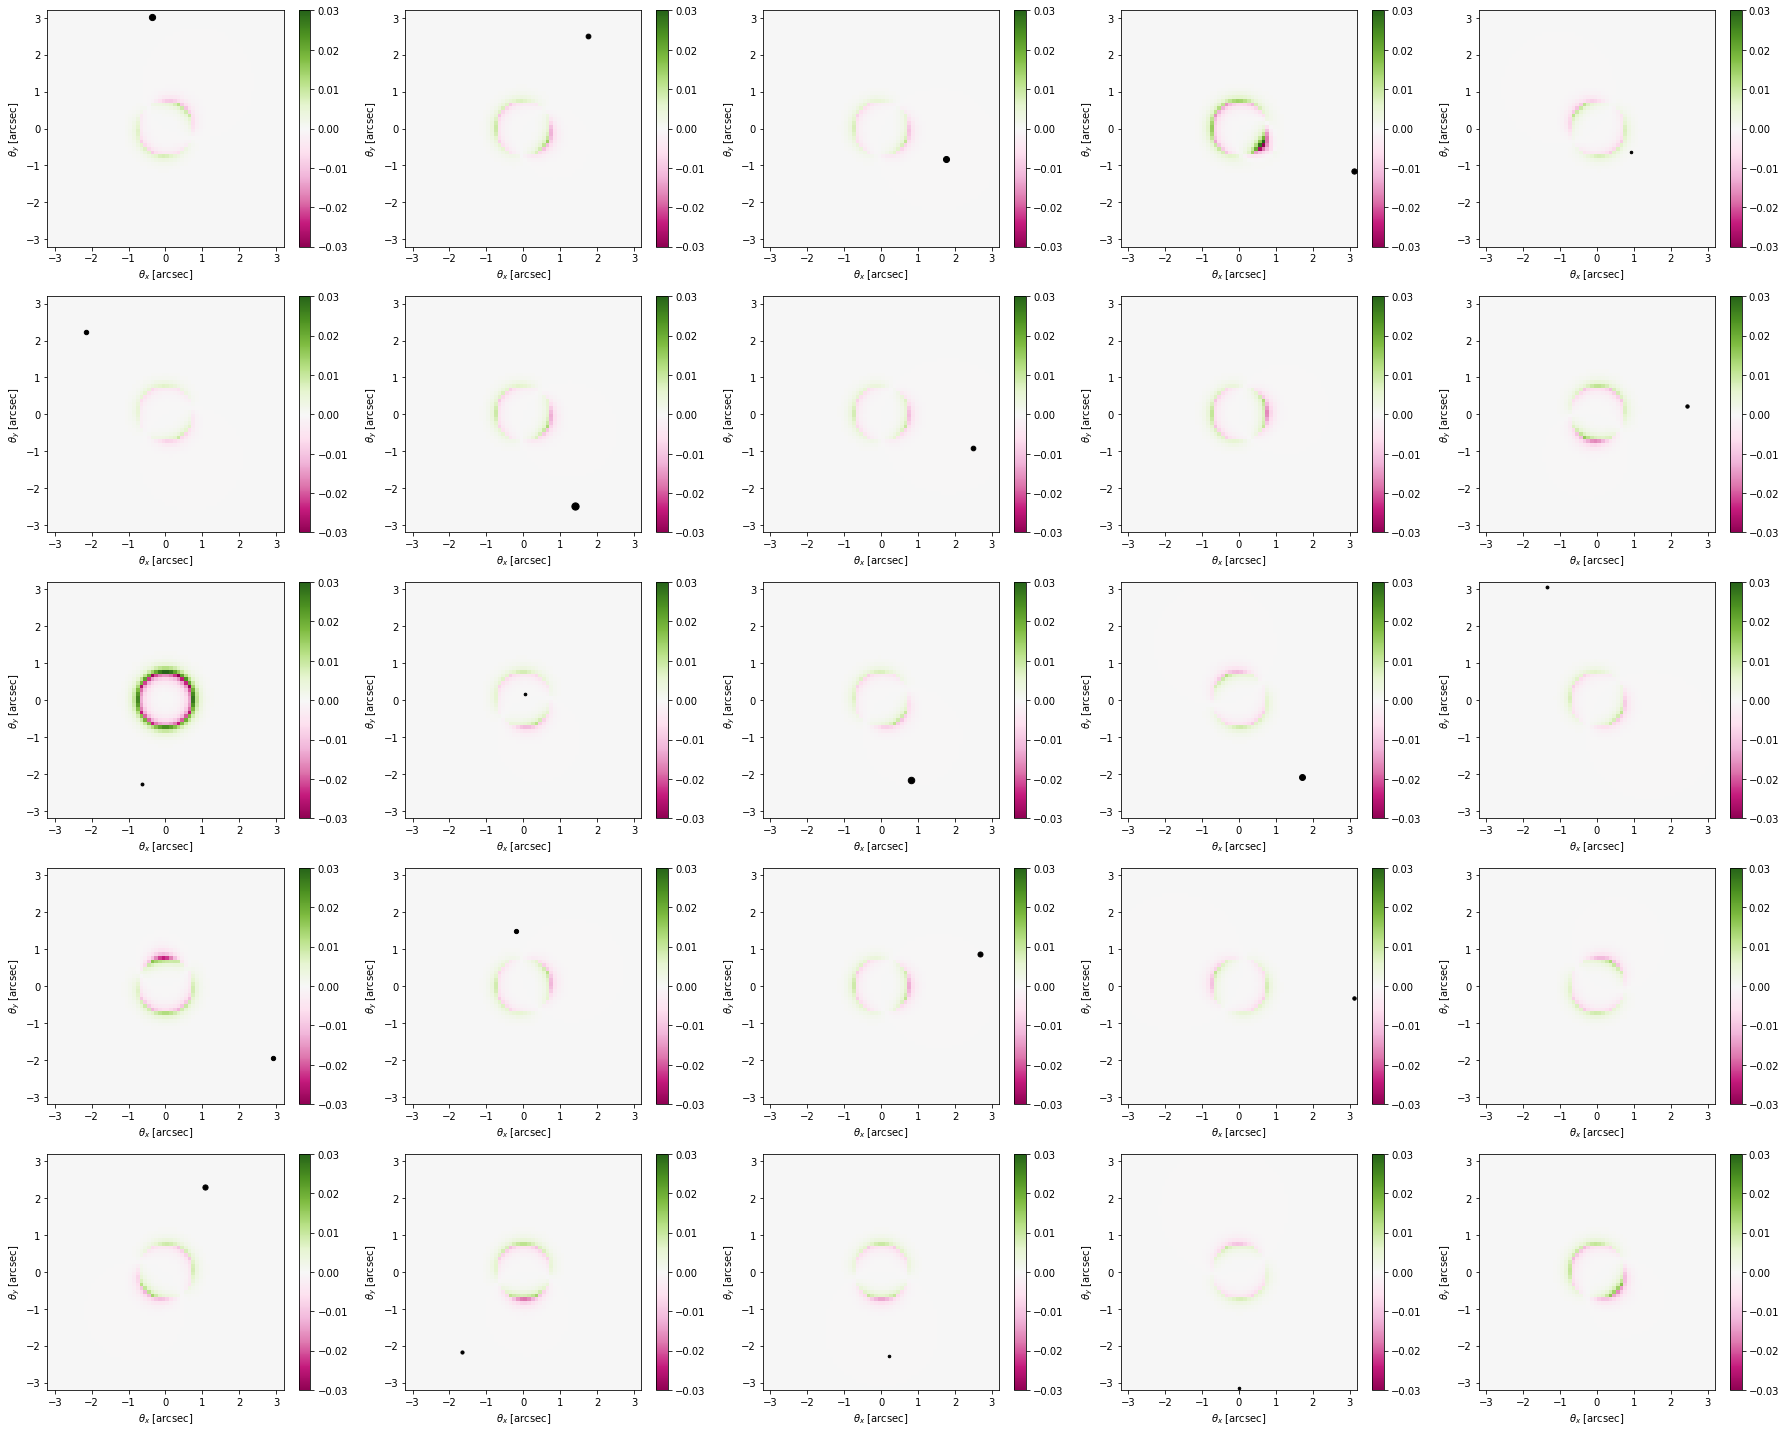

In [37]:
plt.figure(figsize=(5*5.,5*4.))

for i in range(n_show):
    ax = plt.subplot(5,5,i+1)
        
    im = plt.imshow(
        dx_dm[i_img][i,:,:]*1.e6*M_s,
        vmin=-0.03,
        vmax=0.03,
        cmap='PiYG',
        extent=(-3.2,3.2,-3.2,3.2),
        origin="lower"
    )
    plt.colorbar(im)
    sc = plt.scatter(
        [sub_latents[i_img][i,1]],
        [sub_latents[i_img][i,2]],
        c=["black"],
        s=[195 + 30 * np.log10(sub_latents[i_img][i,0] / global_latents[i_img,0])],
    )
    
    plt.xlim(-3.2,3.2)
    plt.ylim(-3.2,3.2)

    plt.xlabel(r"$\theta_x$ [arcsec]")
    plt.ylabel(r"$\theta_y$ [arcsec]")
    cbar.set_label(r'$\nabla_{m} \; \bar{x}_{ij}$ [$10^6\;M_S$]')
    
plt.tight_layout()
plt.savefig("../figures/subhalo_gradient_imgs.pdf")